# **SENTIMENT ANALYSIS**

## **SCRAPE DATA**

### **REDDIT**

In [26]:
!pip3 install praw --upgrade praw
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install emot

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import praw

In [29]:
reddit = praw.Reddit(client_id='PoJ1PoHrtNCZjreLKZLhFQ',
                     client_secret='jO-9Y2sB0eyj-fF0lI1DSqHD0s3TFg',
                     user_agent='scraper_app',
                     check_for_async=False )

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emot
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, MWETokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder, TrigramCollocationFinder

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
from emot.emo_unicode import UNICODE_EMOJI

lemmatizer = WordNetLemmatizer()

from wordcloud import ImageColorGenerator
from PIL import Image

import warnings

eng_stop_words = list(stopwords.words('english'))

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
# General Population Subreddits
random_subreddits = ["OutOfTheLoop"]


opinion_subreddits = ["AskReddit",
                  "TooAfraidToAsk",
                  "NoStupidQuestions",
                  "unpopularopinion"]


news_subreddits = ["news",
                   "worldnews"]


political_subreddits = ["politics"]


college_subreddits = ["college",
                     "ApplyingToCollege",
                     "CollegeRant",
                     "CollegeAdmissions",
                     "CollegeMajors",
                     "CollegeTransfer",
                     "CollegeStudents",
                     "CollegePrep",
                     "CollegeSurvival",
                     "resumes",
                     "chanceme",
                     "Sat",
                     "ACT",
                     "collegeresults",
                     "gradadmissions",
                     "highereducation"]

# combine all to find General Population
general_subreddits = random_subreddits + opinion_subreddits + news_subreddits + political_subreddits + college_subreddits


# Latin/Hispanic People
latinx_subreddits = ['asklatinamerica',
                     'hispanic']

# Asian People
asian_subreddits = ["asian",
                    "AsianMasculinity",
                    "aznidentity",
                    "asianamerican",
                    "AsianParentStories",
                    "ABCDesis",
                    "asiantwoX"]

# Black People
black_subreddits = ["blackladies",
                    "BlackPeopleTwitter",
                    "blackculture",
                    "AfricanAmerican",
                    "askblackpeople",
                    "blackmen"]

# Indigenous Groups/Native American People
indigenous_subreddits = ["NativeAmerican",
                         "IndianCountry"]


In [32]:
# list to store all the submissions scraped from subreddits
posts = []

# list to store asian submissions
asian_posts = []

# list to store black submissions
black_posts = []

# list to store latinx submissions
latinx_posts = []

# list to store indigenous submissions
indigenous_posts = []


# scrape posts about 'affirmative action' from all types of subreddits

for subreddit in general_subreddits:
  submissions = reddit.subreddit(subreddit).search(query = 'affirmative action', sort = 'relevance', limit = 75)
  for submission in submissions:
    posts.append([submission.title, submission.score, submission.id, submission.subreddit, submission.permalink, submission.num_comments, submission.selftext, submission.created])


for subreddit in asian_subreddits:
  submissions = reddit.subreddit(subreddit).search(query = 'affirmative action', sort = 'relevance', limit = 75)
  for submission in submissions:
    posts.append([submission.title, submission.score, submission.id, submission.subreddit, submission.permalink, submission.num_comments, submission.selftext, submission.created])
    asian_posts.append([submission.title, submission.score, submission.id, submission.subreddit, submission.permalink, submission.num_comments, submission.selftext, submission.created])


for subreddit in black_subreddits:
  submissions = reddit.subreddit(subreddit).search(query = 'affirmative action', sort = 'relevance', limit = 75)
  for submission in submissions:
    posts.append([submission.title, submission.score, submission.id, submission.subreddit, submission.permalink, submission.num_comments, submission.selftext, submission.created])
    black_posts.append([submission.title, submission.score, submission.id, submission.subreddit, submission.permalink, submission.num_comments, submission.selftext, submission.created])


for subreddit in latinx_subreddits:
  submissions = reddit.subreddit(subreddit).search(query = 'affirmative action', sort = 'relevance', limit = 75)
  for submission in submissions:
    posts.append([submission.title, submission.score, submission.id, submission.subreddit, submission.permalink, submission.num_comments, submission.selftext, submission.created])
    latinx_posts.append([submission.title, submission.score, submission.id, submission.subreddit, submission.permalink, submission.num_comments, submission.selftext, submission.created])


for subreddit in indigenous_subreddits:
  submissions = reddit.subreddit(subreddit).search(query = 'affirmative action', sort = 'relevance', limit = 75)
  for submission in submissions:
    posts.append([submission.title, submission.score, submission.id, submission.subreddit, submission.permalink, submission.num_comments, submission.selftext, submission.created])
    indigenous_posts.append([submission.title, submission.score, submission.id, submission.subreddit, submission.permalink, submission.num_comments, submission.selftext, submission.created])





In [33]:
reddit_posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
asian_posts = pd.DataFrame(asian_posts, columns = ['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
black_posts = pd.DataFrame(black_posts, columns = ['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
latinx_posts = pd.DataFrame(latinx_posts, columns = ['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
indigenous_posts = pd.DataFrame(indigenous_posts, columns = ['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])

reddit_posts["text"] = reddit_posts["title"] + " " + reddit_posts["body"]
asian_posts["text"] = asian_posts["title"] + " " + asian_posts["body"]
black_posts["text"] = black_posts["title"] + " " + black_posts["body"]
latinx_posts["text"] = latinx_posts["title"] + " " + latinx_posts["body"]
indigenous_posts["text"] = indigenous_posts["title"] + " " + indigenous_posts["body"]
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 1000)
reddit_posts

,title,score,id,subreddit,url,num_comments,body,created,text
0,What’s the deal with the Supreme Court’s decision on affirmative action?,1374,14mdusn,OutOfTheLoop,/r/OutOfTheLoop/comments/14mdusn/whats_the_deal_with_the_supreme_courts_decision/,731,I’ve never heard of the term “affirmative action” and tried to figure out online what it is. I’ve also seen mixed reactions on this and can’t tell what the implications are from this decision. Can someone explain? \n\nhttps://www.msn.com/en-us/news/us/supreme-court-strikes-down-college-affirmative-action-programs/ar-AA1dd61j,1.688067e+09,What’s the deal with the Supreme Court’s decision on affirmative action? I’ve never heard of the term “affirmative action” and tried to figure out online what it is. I’ve also seen mixed reactions on this and can’t tell what the implications are from this decision. Can someone explain? \n\nhttps://www.msn.com/en-us/news/us/supreme-court-strikes-down-college-affirmative-action-programs/ar-AA1dd61j
1,What is going on with the U.S. DOJ and Affirmative Action?,6,yixgia,OutOfTheLoop,/r/OutOfTheLoop/comments/yixgia/what_is_going_on_with_the_us_doj_and_affirmative/,7,"For the sake of context:\n\n• What is Affirmative Action?\n\n• Which side is for/against it?\n\n• Who are the biggest proponents?\n\n• What led it to a U.S. Supreme Court case?\n\n• What was/is the status, and what would it change if turned over?\n\nhttps://apnews.com/article/ketanji-brown-jackson-us-supreme-court-racial-injustice-north-carolina-college-admissions-e88c3061f20eef5aaddd1b69b1aaf68e",1.667273e+09,"What is going on with the U.S. DOJ and Affirmative Action? For the sake of context:\n\n• What is Affirmative Action?\n\n• Which side is for/against it?\n\n• Who are the biggest proponents?\n\n• What led it to a U.S. Supreme Court case?\n\n• What was/is the status, and what would it change if turned over?\n\nhttps://apnews.com/article/ketanji-brown-jackson-us-supreme-court-racial-injustice-north-carolina-college-admissions-e88c3061f20eef5aaddd1b69b1aaf68e"
2,What is going on with this girl Abigail fisher and affirmative action?,14,4phycu,OutOfTheLoop,/r/OutOfTheLoop/comments/4phycu/what_is_going_on_with_this_girl_abigail_fisher/,13,"I keep seeing her on Twitter with the hashtag ""#beckywiththebadgrades""",1.466703e+09,"What is going on with this girl Abigail fisher and affirmative action? I keep seeing her on Twitter with the hashtag ""#beckywiththebadgrades"""
3,What's the deal with the supreme court allowing businesses to discriminate?,114,14ny7v9,OutOfTheLoop,/r/OutOfTheLoop/comments/14ny7v9/whats_the_deal_with_the_supreme_court_allowing/,159,This is/was a top post on all: https://i.redd.it/8sdtz3k79c9b1.jpg\n\nIt says the supreme court ruled that businesses can discriminate... Is that true? I know there was an affirmative action decision recently. Is this related to that?,1.688226e+09,What's the deal with the supreme court allowing businesses to discriminate? This is/was a top post on all: https://i.redd.it/8sdtz3k79c9b1.jpg\n\nIt says the supreme court ruled that businesses can discriminate... Is that true? I know there was an affirmative action decision recently. Is this related to that?
4,"What's going on with the recent UN vote to ""combat glorification of Nazism,"" and so many nations not voting yes?",6971,khuwks,OutOfTheLoop,/r/OutOfTheLoop/comments/khuwks/whats_going_on_with_the_recent_un_vote_to_combat/,893,"The vote in question still passed overwhelmingly, but based on what it was about (combating the glorification of Nazism, neo-Nazism, and similar ideologies and groups) I don't understand why so many nations DIDN'T vote Yes as well. The United States and Ukraine both voted No, and nearly 60 other nations (many of which are first-world countries) Abstained. Could someone who knows more about the UN or the specific vote in question clarify why? Thanks!\n\nhttps://digitallibrary.un.org/record/3894841?ln=en",1.608600e+09,"What's going on with the recent UN vote to ""combat glo

In [ ]:
reddit_posts['subreddit'].value_counts()

aznidentity           75
NoStupidQuestions     75
unpopularopinion      75
AsianMasculinity      75
politics              75
AskReddit             75
ApplyingToCollege     75
asianamerican         75
news                  72
ABCDesis              69
blackladies           59
TooAfraidToAsk        51
highereducation       42
chanceme              36
college               26
worldnews             26
gradadmissions        18
collegeresults        15
AsianParentStories    12
askblackpeople        12
BlackPeopleTwitter    11
OutOfTheLoop           9
asiantwoX              8
blackmen               7
IndianCountry          7
asian                  6
AfricanAmerican        6
NativeAmerican         5
Sat                    4
asklatinamerica        4
Hispanic               4
resumes                3
blackculture           3
ACT                    2
CollegeRant            2
Name: subreddit, dtype: int64

In [24]:
import time
from praw.models import MoreComments

# comments = []
# for i in range(1, reddit_posts.shape[0]):
#   url = "https://www.reddit.com" + reddit_posts.iloc[i].url
#   post = reddit.submission(url = url)

#   post.comments.replace_more(limit = None)
#   for comment in post.comments.list():
#     if comment.author != None and comment.body.lower() != "[deleted]" and comment.body.lower() != "[removed]":
#       comments.append([comment.body])
#     else:
#       continue
#   time.sleep(1)

# comments = pd.DataFrame(comments, columns = ["comment text"])
# comments

reddit_comments = []


for i in range(1, reddit_posts.shape[0]):
  url = "https://www.reddit.com" + reddit_posts.iloc[i].url
  submission = reddit.submission(url=url)

  # submission.comments.replace_more(limit=1)
  for comment in submission.comments.list():
    if isinstance(comment, MoreComments):
      continue
    if comment.author == None or comment.body.lower() == "[deleted]" or comment.body.lower() == "[removed]":
      continue
    reddit_comments.append([comment.body])
  time.sleep(1)

reddit_comments = pd.DataFrame(reddit_comments, columns = ["text"])
reddit_comments

,text
0,"\nFriendly reminder that all **top level** comments must: \n\n1. start with ""answer: "", including the space after the colon (or ""question: "" if you have an on-topic follow up question to ask),\n\n2. attempt to answer the question, and \n\n3. be unbiased\n\nPlease review Rule 4 and this post before making a top level comment:\n\nhttp://redd.it/b1hct4/\n\nJoin the OOTL Discord for further discussion: https://discord.gg/ejDF4mdjnh\n\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/OutOfTheLoop) if you have any questions or concerns.*"
1,"Answer:\n\n>What is Affirmative Action?\n\nIt refers to a broad array of policies by universities (and depending on context, businesses. This SCOTUS case is for universities), to try to improve the diversity of their admissions programs. It is well known that minorities like Black people or hispanic people are underrepresented in terms of college. admissions/enrollment/completion. Universities have tried to address this directly. This can be tricky, because some of the factors that go into it aren't controlled by universities- it's not just that their admissions offices are biased, but also things like systemic racism in broader society. So if universities want to not ignore that disparity, they need to find a way to adjust for that, since they can't fix society by themselves. Otherwise you end up with a skewed admissions pool.\n\nUnder affirmative action, the university can consider an applicants race/background as a part of the application. These days, most universities use a hol..."
2,"Answer: The article you provided has a lot of this info.\n\n**What is affirmative action?**\n\nIn the broadest sense, affirmative action is any policy intended to end and/or correct the effects of discrimination. However, when people talk about affirmative action, they're generally referring to one particular type of affirmative action: Race-conscious school admissions. This is when a college (or other program) intentionally tries to increase the racial diversity of its student body by accepting more applicants who are part of races underrepresented on campus. \n\n**Which side is for/against it? Who are the biggest proponents?**\n\nIn this Supreme Court case, Harvard and UNC (2 universities) are supporting affirmative action while an organization representing some students is opposing it. In general, support for affirmative action is more common among liberals/Democrats who contend that it helps counter historical injustices and provides more opportunities to students at a dis..."
3,"Asian students really threw a bone into AA. \n\nIf African American students are under represented, then Asian students are over represented. Thats a very tough angle when looking at admissions criteria that include race. \n\nShould Asian students have a higher requirement for college because of over representation?"
4,"Another quick example of a problem AA can create while having very good intentions- say there’s a regional manager position opening up soon at a fortune 500 corporation because someones retiring, and 7 different workers underneath that position are all competing to fill that role. The competition is going well and 3 contestants are absolutely standing out with stellar performance on tasks related to the new role, with two contestants just generally giving a tad more effort without getting recognized and two others literally putting in no extra effort and are just kind of not actually caring if they get it. Obviously the top 3 performers are going to be selected as candidates to rise up to the new position, but unbeknownst to any of them the corporations PR teams have been pushing an affirmative action mandated claim- that 15% or more of their regional managers are race Y instead of having a fully race X leadership. \n\nIn the case of our specific manager position opening up, two of..."
...,...
47199,Thanks - I added an 

In [18]:
indigenous_comments = []


for i in range(1, indigenous_posts.shape[0]):
  url = "https://www.reddit.com" + indigenous_posts.iloc[i].url
  submission = reddit.submission(url=url)

  # submission.comments.replace_more(limit=1)
  for comment in submission.comments.list():
    if isinstance(comment, MoreComments):
      continue
    if comment.author == None or comment.body.lower() == "[deleted]" or comment.body.lower() == "[removed]":
      continue
    indigenous_comments.append([comment.body])
  time.sleep(1)

indigenous_comments = pd.DataFrame(indigenous_comments, columns = ["text"])
indigenous_comments

,text
0,"I don't think that qualifies as a ""debate."""
1,"Eh, another empty complaint receiving plenty of attention from the hive mind. With the exception of a few level-headed folks, nothing new."
2,"Oh great, another round of ""White People Decide What's Best For Everyone."""
3,> Would you consider someone who is 1/4 or 25% Native American\n\nIt depends.\n\n> I did a 23andMe DNA ancestry test on myself and got about 25% Native American\n\nThat does not mean anything.
4,"I mean, if you are not enrolled anywhere, you are not legally defined as ""Indian"" by the U.S. or a particular tribal nation (a whole other box of kittens, with termination era crap etc. because now we're imposing Eurocentric definitions of Nativeness onto ourselves....) and it would be wrong for you to say you are, especially if you don't have a real connection to a community. Just because your DNA test showed your genetic make up consists of genetic material more often seen within Indian populations, does not make you Native. But, like others have said, if you do your research and find out you're from the Yaqui nation or another nation, inquire about citizenship and find ways to actually be involved with that nation's culture. I'm tired of box-checkers taking advantage of what few benefits we do have, without actually giving back to the community they claim to be a part of, which is the whole idea behind affirmative action in the first place! \n\nI'm glad you took the time to ask ..."
5,"I see this is an old post but I came across it from my research into this very topic. My DNA results are 27.3% Indigenous American. Here's the thing, I WANT to learn about that part of my ancestry. But all I can find is gatekeeping left and right. \n\nI get it, you don't want people to get the ""small"" benefits you get. Fine, cool even. But telling people they are not Native Indian when their DNA says differently seems like gatekeeping to me. Here's why. \n\nMy whole life I have been told I'm Mexican and Irish. Had no idea I have very little Mexican blood. Now here's the rub. This has opened a door to me that I wouldn't even consider opening otherwise. Meaning I want to learn about that part of my genetic makeup. I want to learn about what tribe my ancestors belonged to, learn more about what they have gone through, their beliefs, their lifestyle. To me, these are all things that should be welcomed with open arms. Why would a culture that has been wronged so terribly want to block p..."
6,https://en.m.wikipedia.org/wiki/Blood_quantum_laws
7,"In my experience (Mapuche) blood does not make you native. Belonging to community does. \nI know a native from Sonora, they have Opata ancestry. Hope that helps."
8,yeah I agree with this. Op better not start thinking its ok to start wearing First Nation headdresses.
9,"I get what you're saying and no, I'm not one of those people(those $5 Indians or people with very little Native American ancestry that they want to claim but never truly care about the culture) that want to claim Native American ancestry for the sake of being trendy, using it as an ammo for victimhood(I noticed how a lot of White-passing folks of the left-leaning politics all of the suddenly are wanting a slice of the victim cake to get attention or more affirmative action) or wanting free benefits. I just want to figure out what exactly is my American Indian/Native American heritage or tribe from my Native ancestry so I can get in touch with those roots. So far, my mom has told me that my Native ancestry is most likely from the Yaquis in Sonora, Mexico but she still isn't 100% sure. \n\nAgain, I don't care about any Native American benefits or tribal enrollments, I just want closure on what tribe my Native American ancestry is(so I can get in touch with it on my own free time) and..."


In [21]:
asian_comments = []


for i in range(1, asian_posts.shape[0]):
  url = "https://www.reddit.com" + asian_posts.iloc[i].url
  submission = reddit.submission(url=url)

  # submission.comments.replace_more(limit=1)
  for comment in submission.comments.list():
    if isinstance(comment, MoreComments):
      continue
    if comment.author == None or comment.body.lower() == "[deleted]" or comment.body.lower() == "[removed]":
      continue
    asian_comments.append([comment.body])
  time.sleep(1)

asian_comments = pd.DataFrame(asian_comments, columns = ["text"])
asian_comments

,text
0,Affirmative action is racism. End it now.
1,"If you live in an area of less than 15% Asian. Almost all interactions will be either mocking you, ignoring you, or friendly at a distance. In competitive settings like the workplace, never giving Asians executive authority. Americans extremely dislike taking instructions from Asian men."
2,AAs are treated as citizens?? When did that happen??\n\nJust swing by to be cynical…
3,Most people in America aren't racist but the dumb people here are very loud I would say and in all honesty racism is huge in a lot of countries but America basically has a magnifying glass on it because it is seen as a superpower for democracy so overall I just wouldn't pay attention to what the media says most of the country is filled with good people trust me
4,This is so true. Especially in the midwest area of the usa. CA is pretty much the only place that's decent. White folks and hispanics talk too much shit against asians behind their backs btw. I had an asshole literally physically break stuff I was responsible for on purpose to stir up shit.
...,...
10786,"you can't discriminate and not discriminate at the same time. \n\nIt's all bad, stop it."
10787,"It's unfortunate, but I find that our label of ""model minority"" has created a divide between us and other POC. A lot of Asians, subconsciously or not, often see ourselves as ""below the whites but higher than the browns/blacks"". It's pretty insidious, and it really pisses me off when I see this used to manipulate Asians into helping oppress other POC."
10788,"The issue with creating policies to achieve racial balance is that functionally DeBlasio is setting a quota. The ability to change the admissions criteria until a desired ""balance"" is achieved is the ability to set that balance outright."
10789,"Yup, just like with the Harvard affirmative action case"


In [22]:
black_comments = []


for i in range(1, black_posts.shape[0]):
  url = "https://www.reddit.com" + black_posts.iloc[i].url
  submission = reddit.submission(url=url)

  # submission.comments.replace_more(limit=1)
  for comment in submission.comments.list():
    if isinstance(comment, MoreComments):
      continue
    if comment.author == None or comment.body.lower() == "[deleted]" or comment.body.lower() == "[removed]":
      continue
    black_comments.append([comment.body])
  time.sleep(1)

black_comments = pd.DataFrame(black_comments, columns = ["text"])
black_comments

,text
0,"Wow, I honestly never really thought about it. I went to a PWI, with very few black students. Like way less than 10%. I only went because of the scholarship they offered. I feel like maybe some professors looked down on ethnic minority students under the assumption we only got in become we add to the diversity, but I don’t think that’s the reality. I don’t know if AA played into me being accepted into the university (it wasn’t an elite school or anything, like 60% acceptance rate). Honestly the white women need to be shaking in their boots since they benefit the most LMAO."
1,"Bby, GO TO GRADUATE SCHOOL. Don't let this ruling deter you. My only piece of advice would be to consider a larger, diverse city; but even then it's still your choice"
2,"Florida outlawed race consideration in admissions in 1999 when I was in middle school. I went to undergrad and law school in Florida after that. Numbers of black students were very low, so it was a negative impact in that way."
3,"Texas has a top 10% rule where the top 10% of students in any graduating class gets automatic acceptance into any public college. I graduated 3rd in my class so AA didn’t benefit me in that regard. I can’t say it mattered when I got my graduate degree either because my grades and GRE scores met the requirements. \n\nI think people think AA meant that any Black person off the street could get special treatment just for being Black. The truth is, everyone has to meet the basic requirements, unless your family is rich and can just buy a building to get you in."
4,Not at all and I suspect it didn't benefit most black people.
...,...
3167,"We will absolutely still have critics. There will still be lawsuits from white people against universities and colleges that reject them and favor minorities. They will continue to pity minorities against each other (in this case, a white jewish man who organized these Asians.) \n\nIf someone doesn't like you, they will gossip, manipulate, and say anything about you to disparage and discount your successes regardless. They'll still say shit like, ""You only got in because they needed a Black person to make their college look diverse."""
3168,Slow burn podcast Joel Anderson of slate check it out.
3169,We’re always criticizing the black men who’re successful and advocate for what they want. Why not criticize some of the white people? Now why would he advocate for it if he doesn’t agree with it? I get tired of black men claiming other black men aren’t loyal or “self hate” just because they don’t serve your cause. If we want black success/power then that means having the right or ability to advocate for what they want. Not even criticizing the talking points this post is literally a personal attack
3170,"Well problem solved. How about you post a white person and we criticize him? because I promise you black people do that s*** all day every day.\n\nYou're right though when black people gain success we should expect them to act for the benefit of other black people, no it's every man for himself, especially now that they're rich. God I love our individualistic capitalist obsessed culture."


In [23]:
latinx_comments = []


for i in range(1, latinx_posts.shape[0]):
  url = "https://www.reddit.com" + latinx_posts.iloc[i].url
  submission = reddit.submission(url=url)

  # submission.comments.replace_more(limit=1)
  for comment in submission.comments.list():
    if isinstance(comment, MoreComments):
      continue
    if comment.author == None or comment.body.lower() == "[deleted]" or comment.body.lower() == "[removed]":
      continue
    latinx_comments.append([comment.body])
  time.sleep(1)

latinx_comments = pd.DataFrame(latinx_comments, columns = ["text"])
latinx_comments

,text
0,"In Peru, public universities must reserve some admissions for victims of terrorism. Also, every school, university and businesses with more than fifty workers has to fulfill a quota of 5% reserved for disabled people. While I have benefitted from this, I have to admit it's nothing more than a band-aid for our inequality problems."
1,"Affirmative what?? We have free public university\nEven ppl from other countries come to study (brazil, costa rica, Peru, Colombia , venezuela) cool ppl from other countries very loud and friendly"
2,"Generally speaking...\n\nGraduation courses in federal university reserve 50% of spots for people who studied in public education *and* have limited income. \n\nThese 50% are divided into two halves: 25% of spots for Black and Pardo students from a lower socioeconomic situation and 25% of spots for general students (that don't identify as Black or Pardo) from a lower socioeconomic situation.\n\nMy class was the last one to be approved into uni before the affirmative actions came into place. Mostly white, middle class (or upper) families, most of them studied in the same 4 or 5 schools before university. Very few diversity. Starting from the subsequent year, the profile of students was radically different. I love it."
3,"There's a project to create affirmative action for black people, in theory it was intended to reserve 7% of government works for blacks, however is supposed to be a temporary measure, when the playing field is even the measure would be dismissed. Imo this not a big deal, is just 7%.\n\nHowever from a legal point of view affirmative actions are discriminatory, no matters how it's reasoned."
4,"I can see how it was something that was done with good intentions, but I think it should be based on class, not race. A poor white or Asian kid is going to face more challenges than Michael Jordan's son."
5,"The way it's done in Brazil is very controversial, I don't really agree with it"
6,"I think it's dumb and honestly kinda racist to have a X amount of places exclusive to black and _pardo_ people (which is what happens here). It should just be by income. Specially when the majority of the country isn't white and can or can not be considered black, depending on who you ask, and social class is what divide us the most.\n\nBut I don't really have an opinion for other countries. It might make sense for the US. And for indigenous people in Brazil it does make sense."
7,"I think it can make sense in some countries, but I am not really in a position to evaluate other countries' experiences with it.\n\nWe don't have anything like that in Jamaica and it wouldn't make sense here."
8,It doesn't exist.\n\nBe allowed to go to university for your color against someone more qualified is prosperous anyway.
9,I don't like affirmative action


In [25]:
reddit_comments.to_csv('/content/drive/My Drive/URV-AA Sentiment Analysis/reddit_comments.csv', index = False)
asian_comments.to_csv('/content/drive/My Drive/URV-AA Sentiment Analysis/asian_comments.csv', index = False)
black_comments.to_csv('/content/drive/My Drive/URV-AA Sentiment Analysis/black_comments.csv', index = False)
latinx_comments.to_csv('/content/drive/My Drive/URV-AA Sentiment Analysis/latinx_comments.csv', index = False)
indigenous_comments.to_csv('/content/drive/My Drive/URV-AA Sentiment Analysis/indigenous_comments.csv', index = False)

## **PREPROCESSING**

# **Cleaning data from Reddit Submissions and Comments**

In [34]:
import ast

reddit_comments = pd.read_csv("/content/drive/My Drive/URV-AA Sentiment Analysis/reddit_comments.csv", keep_default_na = False)
general_data = reddit_comments
asian_data = asian_comments
black_data = black_comments
latinx_data = latinx_comments
indigenous_data = indigenous_comments

In [35]:
eng_stop_words = list(stopwords.words('english'))
eng_stop_words.extend(["im","would","what","[deleted]","deleted","’"])
emoji = list(UNICODE_EMOJI.keys())

# return lemma_words to use gensim
def processedText(text):
  text = text.lower()
  text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)"," ",text).split())
  text = re.sub(r'\@\w+|\#\w+|\d+','',text)
  punct = str.maketrans('', '', string.punctuation + string.digits)
  text = text.translate(punct)
  tokens = word_tokenize(text)
  filtered_words = [w for w in tokens if w not in eng_stop_words]
  filtered_words = [w for w in filtered_words if w not in emoji]
  lemmatizer = WordNetLemmatizer()
  lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
  text = " ".join(lemma_words)
  #return text
  return lemma_words

general_data['Processed_Text'] = general_data['text'].apply(processedText)
asian_data['Processed_Text'] = asian_data['text'].apply(processedText)
black_data['Processed_Text'] = black_data['text'].apply(processedText)
latinx_data['Processed_Text'] = latinx_data['text'].apply(processedText)
indigenous_data['Processed_Text'] = indigenous_data['text'].apply(processedText)



In [36]:
text = general_data['text'].to_numpy()
documents = [str(text[i]).lower() for i in range(len(text))]
documents = [word_tokenize(item) for item in documents]
punctuations = r".,\"-\\/#!?$%\^&\*;:{}=\-_'~()"
documents = [[token for token in item if (token not in punctuations and token not in eng_stop_words and len(token) > 4 and '-' not in token)] for item in documents]
lemmatizer = WordNetLemmatizer()
documents = [[lemmatizer.lemmatize(token) for token in item] for item in documents]
documents = [[lemmatizer.lemmatize(token, 'v') for token in item] for item in documents]
documents = [[lemmatizer.lemmatize(token, 'a') for token in item] for item in documents]
documents = [[lemmatizer.lemmatize(token, 'r') for token in item] for item in documents]
# Find most common bigrams
bigram_finder = BigramCollocationFinder.from_documents(documents)
bigram_finder.apply_freq_filter(min_freq=3)
bigrams = list(bigram_finder.ngram_fd.items())
# Finding most common trigrams
trigram_finder = TrigramCollocationFinder.from_documents(documents)
trigram_finder.apply_freq_filter(min_freq=3)
trigrams = list(trigram_finder.ngram_fd.items())
# Replacing collocations in text
bigrams = [bigram for bigram, freq in bigram_finder.ngram_fd.items()]
trigrams = [trigram for trigram, freq in trigram_finder.ngram_fd.items()]
mwe_tokenizer = MWETokenizer(bigrams + trigrams, separator='_')
documents = [mwe_tokenizer.tokenize(item) for item in documents]
general_data["Processed_Text"] = documents
general_data["Processed_Text_String"] = [" ".join(general_data["Processed_Text"][i]) for i in range(0, len(general_data["Processed_Text"]))]
general_data["Processed_Text_String"]

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            friendly_reminder_level comment_start answer_include space colon question_follow_question attempt_answer_question unbiased_please review_make_level comment_//redd.it/b1hct4/ discord discussion_http //discord.gg/ejdf4mdjnh action_perform_automatically please_contact_moderator subreddit_/message/compose/_to=/r/outoftheloop question

In [37]:
text = asian_data['text'].to_numpy()
documents = [str(text[i]).lower() for i in range(len(text))]
documents = [word_tokenize(item) for item in documents]
punctuations = r".,\"-\\/#!?$%\^&\*;:{}=\-_'~()"
documents = [[token for token in item if (token not in punctuations and token not in eng_stop_words and len(token) > 4 and '-' not in token)] for item in documents]
lemmatizer = WordNetLemmatizer()
documents = [[lemmatizer.lemmatize(token) for token in item] for item in documents]
documents = [[lemmatizer.lemmatize(token, 'v') for token in item] for item in documents]
documents = [[lemmatizer.lemmatize(token, 'a') for token in item] for item in documents]
documents = [[lemmatizer.lemmatize(token, 'r') for token in item] for item in documents]
# Find most common bigrams
bigram_finder = BigramCollocationFinder.from_documents(documents)
bigram_finder.apply_freq_filter(min_freq=3)
bigrams = list(bigram_finder.ngram_fd.items())
# Finding most common trigrams
trigram_finder = TrigramCollocationFinder.from_documents(documents)
trigram_finder.apply_freq_filter(min_freq=3)
trigrams = list(trigram_finder.ngram_fd.items())
# Replacing collocations in text
bigrams = [bigram for bigram, freq in bigram_finder.ngram_fd.items()]
trigrams = [trigram for trigram, freq in trigram_finder.ngram_fd.items()]
mwe_tokenizer = MWETokenizer(bigrams + trigrams, separator='_')
documents = [mwe_tokenizer.tokenize(item) for item in documents]
asian_data["Processed_Text"] = documents
asian_data["Processed_Text_String"] = [" ".join(asian_data["Processed_Text"][i]) for i in range(0, len(asian_data["Processed_Text"]))]
asian_data["Processed_Text_String"]

0                                                                                                                                                             affirmative_action_racism
1        asian_almost interaction either mock ignore friendly distance competitive set workplace never_give asian executive authority american extremely dislike take instruction asian
2                                                                                                                                                   treat citizen happen swing cynical…
3                           people_america racist_people honesty racism_country america basically magnify glass superpower democracy overall attention medium country fill people_trust
4                                             especially midwest pretty place decent white_folk hispanic_asian behind back asshole literally physically break stuff responsible purpose
                                                                                

In [38]:
text = black_data['text'].to_numpy()
documents = [str(text[i]).lower() for i in range(len(text))]
documents = [word_tokenize(item) for item in documents]
punctuations = r".,\"-\\/#!?$%\^&\*;:{}=\-_'~()"
documents = [[token for token in item if (token not in punctuations and token not in eng_stop_words and len(token) > 4 and '-' not in token)] for item in documents]
lemmatizer = WordNetLemmatizer()
documents = [[lemmatizer.lemmatize(token) for token in item] for item in documents]
documents = [[lemmatizer.lemmatize(token, 'v') for token in item] for item in documents]
documents = [[lemmatizer.lemmatize(token, 'a') for token in item] for item in documents]
documents = [[lemmatizer.lemmatize(token, 'r') for token in item] for item in documents]
# Find most common bigrams
bigram_finder = BigramCollocationFinder.from_documents(documents)
bigram_finder.apply_freq_filter(min_freq=3)
bigrams = list(bigram_finder.ngram_fd.items())
# Finding most common trigrams
trigram_finder = TrigramCollocationFinder.from_documents(documents)
trigram_finder.apply_freq_filter(min_freq=3)
trigrams = list(trigram_finder.ngram_fd.items())
# Replacing collocations in text
bigrams = [bigram for bigram, freq in bigram_finder.ngram_fd.items()]
trigrams = [trigram for trigram, freq in trigram_finder.ngram_fd.items()]
mwe_tokenizer = MWETokenizer(bigrams + trigrams, separator='_')
documents = [mwe_tokenizer.tokenize(item) for item in documents]
black_data["Processed_Text"] = documents
black_data["Processed_Text_String"] = [" ".join(black_data["Processed_Text"][i]) for i in range(0, len(black_data["Processed_Text"]))]
black_data["Processed_Text_String"]

0                                  honestly never_really think_black_student scholarship offer maybe professor look ethnic_minority student assumption become diversity think_reality play accept_university elite_school anything acceptance honestly_white woman shake boot since benefit
1                                                                                                                                                                                                               graduate school rule deter piece advice consider large diverse still choice
2                                                                                                                                                                        florida outlaw consideration admission middle_school undergrad school florida number_black student negative impact
3       texas student_graduate class automatic acceptance public college_graduate class benefit regard matter graduate degree either grade_score req

In [39]:
text = latinx_data['text'].to_numpy()
documents = [str(text[i]).lower() for i in range(len(text))]
documents = [word_tokenize(item) for item in documents]
punctuations = r".,\"-\\/#!?$%\^&\*;:{}=\-_'~()"
documents = [[token for token in item if (token not in punctuations and token not in eng_stop_words and len(token) > 4 and '-' not in token)] for item in documents]
lemmatizer = WordNetLemmatizer()
documents = [[lemmatizer.lemmatize(token) for token in item] for item in documents]
documents = [[lemmatizer.lemmatize(token, 'v') for token in item] for item in documents]
documents = [[lemmatizer.lemmatize(token, 'a') for token in item] for item in documents]
documents = [[lemmatizer.lemmatize(token, 'r') for token in item] for item in documents]
# Find most common bigrams
bigram_finder = BigramCollocationFinder.from_documents(documents)
bigram_finder.apply_freq_filter(min_freq=3)
bigrams = list(bigram_finder.ngram_fd.items())
# Finding most common trigrams
trigram_finder = TrigramCollocationFinder.from_documents(documents)
trigram_finder.apply_freq_filter(min_freq=3)
trigrams = list(trigram_finder.ngram_fd.items())
# Replacing collocations in text
bigrams = [bigram for bigram, freq in bigram_finder.ngram_fd.items()]
trigrams = [trigram for trigram, freq in trigram_finder.ngram_fd.items()]
mwe_tokenizer = MWETokenizer(bigrams + trigrams, separator='_')
documents = [mwe_tokenizer.tokenize(item) for item in documents]
latinx_data["Processed_Text"] = documents
latinx_data["Processed_Text_String"] = [" ".join(latinx_data["Processed_Text"][i]) for i in range(0, len(latinx_data["Processed_Text"]))]
latinx_data["Processed_Text_String"]

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             public_university reserve admission victim terrorism every school_university business fifty worker fulfill quota reserve disable people benefit admit nothing inequality p

In [40]:
text = indigenous_data['text'].to_numpy()
documents = [str(text[i]).lower() for i in range(len(text))]
documents = [word_tokenize(item) for item in documents]
punctuations = r".,\"-\\/#!?$%\^&\*;:{}=\-_'~()"
documents = [[token for token in item if (token not in punctuations and token not in eng_stop_words and len(token) > 4 and '-' not in token)] for item in documents]
lemmatizer = WordNetLemmatizer()
documents = [[lemmatizer.lemmatize(token) for token in item] for item in documents]
documents = [[lemmatizer.lemmatize(token, 'v') for token in item] for item in documents]
documents = [[lemmatizer.lemmatize(token, 'a') for token in item] for item in documents]
documents = [[lemmatizer.lemmatize(token, 'r') for token in item] for item in documents]
# Find most common bigrams
bigram_finder = BigramCollocationFinder.from_documents(documents)
bigram_finder.apply_freq_filter(min_freq=3)
bigrams = list(bigram_finder.ngram_fd.items())
# Finding most common trigrams
trigram_finder = TrigramCollocationFinder.from_documents(documents)
trigram_finder.apply_freq_filter(min_freq=3)
trigrams = list(trigram_finder.ngram_fd.items())
# Replacing collocations in text
bigrams = [bigram for bigram, freq in bigram_finder.ngram_fd.items()]
trigrams = [trigram for trigram, freq in trigram_finder.ngram_fd.items()]
mwe_tokenizer = MWETokenizer(bigrams + trigrams, separator='_')
documents = [mwe_tokenizer.tokenize(item) for item in documents]
indigenous_data["Processed_Text"] = documents
indigenous_data["Processed_Text_String"] = [" ".join(indigenous_data["Processed_Text"][i]) for i in range(0, len(indigenous_data["Processed_Text"]))]
indigenous_data["Processed_Text_String"]

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        think qualify d

## **SENTIMENT ANALYSIS**

In [41]:
def polarity(text):
  return TextBlob(text).sentiment.polarity

def sentimenttextblob(polarity):
  if polarity < 0:
    return 'Negative'
  elif polarity == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [43]:
# general sentiment polarity scores
general_data['Polarity'] = general_data['Processed_Text_String'].apply(polarity)
general_data['Sentiment'] = general_data['Polarity'].apply(sentimenttextblob)
general_sent = general_data['Sentiment'].value_counts()
general_sent

Neutral     25469
Positive    12365
Negative     9371
Name: Sentiment, dtype: int64

In [44]:
# asian sentiment polarity scores
asian_data['Polarity'] = asian_data['Processed_Text_String'].apply(polarity)
asian_data['Sentiment'] = asian_data['Polarity'].apply(sentimenttextblob)
asian_sent = asian_data['Sentiment'].value_counts()
asian_sent

Neutral     4365
Positive    3708
Negative    2718
Name: Sentiment, dtype: int64

In [46]:
# black sentiment polarity scores
black_data['Polarity'] = black_data['Processed_Text_String'].apply(polarity)
black_data['Sentiment'] = black_data['Polarity'].apply(sentimenttextblob)
black_sent = black_data['Sentiment'].value_counts()
black_sent

Neutral     1424
Positive    1036
Negative     712
Name: Sentiment, dtype: int64

In [47]:
# latinx sentiment polarity scores
latinx_data['Polarity'] = latinx_data['Processed_Text_String'].apply(polarity)
latinx_data['Sentiment'] = latinx_data['Polarity'].apply(sentimenttextblob)
latinx_sent = latinx_data['Sentiment'].value_counts()
latinx_sent

Neutral     151
Negative    109
Positive    100
Name: Sentiment, dtype: int64

In [48]:
# indigenous sentiment polarity scores
indigenous_data['Polarity'] = indigenous_data['Processed_Text_String'].apply(polarity)
indigenous_data['Sentiment'] = indigenous_data['Polarity'].apply(sentimenttextblob)
indigenous_sent = indigenous_data['Sentiment'].value_counts()
indigenous_sent

Neutral     27
Negative    11
Positive    11
Name: Sentiment, dtype: int64

## **TOPIC MODELING**

### **WORD CLOUD**

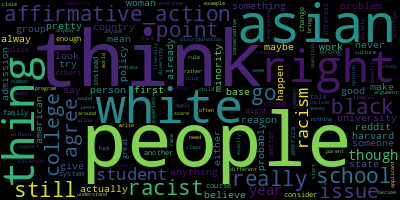

In [53]:
from wordcloud import WordCloud
# Join the different processed text together.
long_string = ','.join(list(general_data['Processed_Text_String'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=5, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### **TOPIC MODELING WITH GENSIM**

In [50]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import corpus2csc
from gensim.models.coherencemodel import CoherenceModel

dictionary = Dictionary(general_data["Processed_Text"])
dictionary.filter_extremes(no_below=5, no_above=0.5)
bow_corpus = [dictionary.doc2bow(text) for text in general_data["Processed_Text"]]
num_topics = 5
ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha="auto", eta="auto")

topics = ldamodel.show_topics(num_topics=num_topics, num_words=20, log=False, formatted=False)

for topic_id, topic in topics:
  print("Topic: {}".format(topic_id))
  print("Words: {}".format([word for word,_ in topic]))

Topic: 0
Words: ['http', 'think', 'people', 'black', 'woman', 'go', 'point', 'indian', 'really', 'country', 'american', 'anything', 'look', 'something', 'since', 'year', 'always', 'community', 'say', 'racist']
Topic: 1
Words: ['affirmative_action', 'group', 'benefit', 'wrong', 'policy', 'fuck', 'immigrant', 'whole', 'fight', 'argument', 'discrimination', 'power', 'take', 'legacy_admission', 'absolutely', 'latino', 'unless', 'deserve', 'argue', 'ignore']
Topic: 2
Words: ['right', 'could', 'never', 'get', 'world', 'asian_american', 'claim', 'india', 'story', 'medium', 'exist', 'conservative', 'follow', 'time', 'whatever', 'rule', 'surprise', 'trump', 'brazil', 'play']
Topic: 3
Words: ['school', 'thing', 'harvard', 'good', 'college', 'student', 'issue', 'thank', 'still', 'pretty', 'comment', 'consider', 'interest', 'work', 'maybe', 'experience', 'university', 'great', 'course', 'family']
Topic: 4
Words: ['asian', 'white', 'agree', 'america', 'privilege', 'racism', 'matter', 'minority', 'b

In [ ]:
# for num_topics in range(2, 11):
#   ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha="auto", eta="auto")
#   cm = CoherenceModel(model=ldamodel, texts=data["Processed_Text"], dictionary=dictionary, coherence='c_v')
#   coherence = cm.get_coherence()  # get coherence value
#   print(num_topics, " ", coherence)

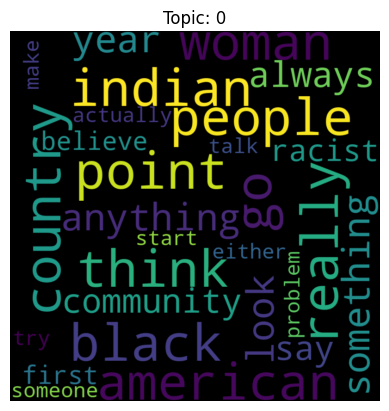

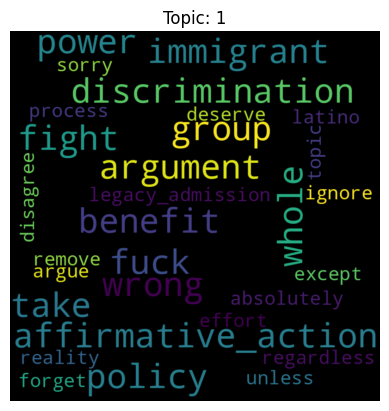

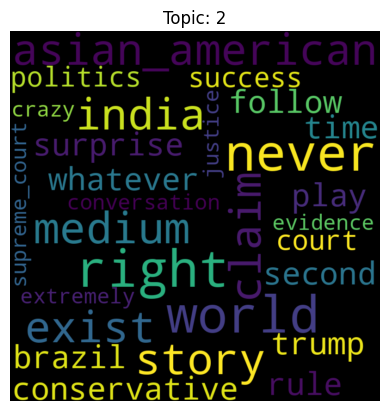

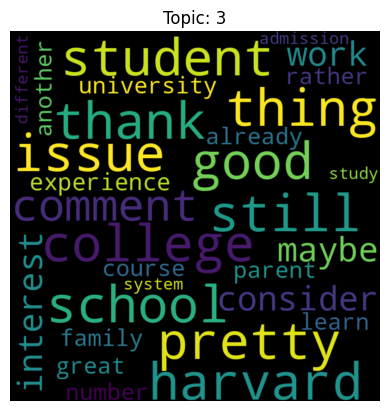

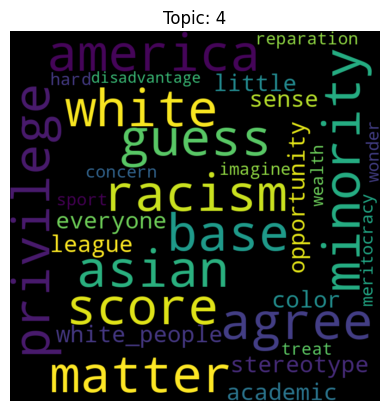

In [51]:
# Plotting a wordcloud of the topics

for topic_id, topic in enumerate(ldamodel.print_topics(num_topics=num_topics, num_words=30)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()